In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
excel_file_path = 'online_retail.xlsx'
df = pd.read_excel(excel_file_path)
csv_file_path = 'retail.csv'
df.to_csv(csv_file_path, index=False)

print(f"Excel file '{excel_file_path}' converted to CSV file '{csv_file_path}'.")

Excel file 'online_retail.xlsx' converted to CSV file 'retail.csv'.


In [3]:
retail_data = pd.read_csv('retail.csv')
retail_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [8]:
retail_data.describe(include="all")

<bound method DataFrame.transpose of        Invoice StockCode                         Description       Quantity  \
count   525461    525461                              522533  525461.000000   
unique   28816      4632                                4681            NaN   
top     537434    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq       675      3516                                3549            NaN   
mean       NaN       NaN                                 NaN      10.337667   
std        NaN       NaN                                 NaN     107.424110   
min        NaN       NaN                                 NaN   -9600.000000   
25%        NaN       NaN                                 NaN       1.000000   
50%        NaN       NaN                                 NaN       3.000000   
75%        NaN       NaN                                 NaN      10.000000   
max        NaN       NaN                                 NaN   19152.000000   

              

In [ ]:
retail_data.shape

(525461, 8)

In [ ]:
retail_data.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [ ]:
retail_data.dropna(inplace = True)

In [ ]:
retail_data.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
retail_data.shape

(417534, 8)

In [ ]:
retail_data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
retail_data = retail_data[['Description','Quantity','Price','Country']]

In [ ]:
retail_data.duplicated().sum()

353586

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) # Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] # Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] # Stemming
  return stemmed_text

In [ ]:
print("\n All Data Labels")
print(retail_data.groupby("Quantity").count())


 All Data Labels
          Description  Price  Country
Quantity                             
-9360               1      1        1
-7128               1      1        1
-7008               1      1        1
-5184               1      1        1
-4992               1      1        1
...               ...    ...      ...
 10000              4      4        4
 12480              1      1        1
 12744              1      1        1
 12960              2      2        2
 19152              1      1        1

[500 rows x 3 columns]


In [ ]:
retail_data['Description'] = retail_data['Description'].apply(preprocess_text)

retail_data.head()

,Description,Quantity,Price,Country
0,"[15cm, christma, glass, ball, 20, light]",12,6.95,United Kingdom
1,"[pink, cherri, light]",12,6.75,United Kingdom
2,"[white, cherri, light]",12,6.75,United Kingdom
3,"[record, frame, 7, singl, size]",48,2.10,United Kingdom
4,"[strawberri, ceram, trinket, box]",24,1.25,United Kingdom


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(retail_data['Description'].map(''.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4299,4300,4301,4302,4303,4304,4305,4306,4307,4308
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
y = retail_data['Quantity']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8,test_size=0.2,random_state=99)

In [ ]:
# generate variable with preprocessed text
retail_data['Description_token'] = [cleanTextToken(text) for text in retail_data['Description']]

In [ ]:
retail_data

,Description,Quantity,Price,Country,Description_token
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,"[cm, christmas, glass, ball, light]"
1,PINK CHERRY LIGHTS,12,6.75,United Kingdom,"[pink, cherry, light]"
2,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,"[white, cherry, light]"
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,"[record, frame, single, size]"
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,"[strawberry, ceramic, trinket, box]"
...,...,...,...,...,...
525456,FELTCRAFT DOLL ROSIE,2,2.95,United Kingdom,"[feltcraft, doll, rosie]"
525457,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,United Kingdom,"[feltcraft, princess, lola, doll]"
525458,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,United Kingdom,"[feltcraft, princess, olivia, doll]"
525459,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,United Kingdom,"[pink, floral, feltcraft, shoulder, bag]"


In [ ]:
def wordCount(txt_list):
    ''' count frequency of words in tokenized list
        and save in dataframe
    '''
    wordfreq = {'word':[],'freq':[]}
    for word in txt_list:
        if word not in wordfreq['word']:
            wordfreq['word'].append(word)                   # save word
            wordfreq['freq'].append(txt_list.count(word))   # save freq
    count = pd.DataFrame(wordfreq)
    # sort_values in df
    count.sort_values('freq', inplace=True, ascending=False)
    return count

In [ ]:
# combine all words in reviews
all_tokens = []
for comment in retail_data['Description_token']:
    for word in comment:
        all_tokens.append(word)

In [ ]:
len(all_tokens)

1692226

In [ ]:
# count words in reviews
all_count = wordCount(all_tokens[0:1500000])

In [ ]:
# identify classes for words in all_count
all_count['category'] = [nltk.pos_tag([word])[0][1] for word in all_count['word'] ]

In [ ]:
# view all list of features
list(all_count.query("freq > 500 and category in ['NN', 'JJ']")['word'])

['set',
 'red',
 'heart',
 'bag',
 'pink',
 'white',
 'box',
 'cake',
 'light',
 'metal',
 'design',
 'blue',
 'retrospot',
 'spotty',
 'vintage',
 'holder',
 'spot',
 'sign',
 'pack',
 'christmas',
 'paper',
 'small',
 'jumbo',
 'tea',
 'glass',
 'candle',
 'card',
 'lunch',
 'retro',
 'case',
 'ceramic',
 'large',
 'wooden',
 'decoration',
 'fairy',
 'skull',
 'mug',
 'tin',
 'water',
 'hot',
 'bottle',
 'door',
 'paisley',
 'black',
 'cream',
 'bowl',
 'strawberry',
 'garden',
 'party',
 'spaceboy',
 'union',
 'flower',
 'feltcraft',
 'home',
 'mini',
 'ribbon',
 'wood',
 'woodland',
 'bunting',
 'stand',
 'green',
 'birthday',
 'silver',
 'trinket',
 'cutlery',
 'colour',
 'mat',
 'child',
 'wrap',
 'love',
 'bird',
 'sweetheart',
 'star',
 'jack',
 'gift',
 'zinc',
 'frame',
 'tube',
 'napkin',
 'butterfly',
 'doormat',
 'ivory',
 'pencil',
 'block',
 'gingham',
 'plate',
 'kit',
 'cover',
 'hook',
 'piece',
 'charlotte',
 'cup',
 'round',
 'dot',
 'wicker',
 'antique',
 'tissue',

In [ ]:
features = list(all_count.query("freq > 500 and category in ['NN', 'JJ']")['word'])

In [ ]:
def wordsInRow(words, token_row):
    ''' indentify if words is in list of tokens,
        return list with words intersected
    '''
    new_row = []
    for word in words:
        if word in token_row:
            new_row.append(word)
    return new_row

In [ ]:
# capture aspects in review
retail_data['review_aspects'] = retail_data['Description_token'].apply(lambda row: wordsInRow(features, row))

In [ ]:
# capture adjectives in review
adjectives = list(all_count['word'][all_count['category'] == 'JJ'])
retail_data['review_adjectives'] = retail_data['Description_token'].apply(lambda row: wordsInRow(adjectives, row))

In [ ]:
# review user binary classification
retail_data['review_classification'] = [1 if x >= 4 else -1 for x in retail_data['Price']]

In [ ]:
retail_data

,Description,Quantity,Price,Country,Description_token,review_aspects,review_adjectives,review_classification
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,"[cm, christmas, glass, ball, light]","[light, christmas, glass, ball, cm]",[],1
1,PINK CHERRY LIGHTS,12,6.75,United Kingdom,"[pink, cherry, light]","[pink, light, cherry]",[],1
2,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,"[white, cherry, light]","[white, light, cherry]",[white],1
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,"[record, frame, single, size]","[frame, single, size]",[single],-1
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,"[strawberry, ceramic, trinket, box]","[box, ceramic, strawberry, trinket]",[ceramic],-1
...,...,...,...,...,...,...,...,...
525456,FELTCRAFT DOLL ROSIE,2,2.95,United Kingdom,"[feltcraft, doll, rosie]","[feltcraft, doll]",[],-1
525457,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,United Kingdom,"[feltcraft, princess, lola, doll]","[feltcraft, doll, lola]",[],-1
525458,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,United Kingdom,"[feltcraft, princess, olivia, doll]","[feltcraft, doll]",[],-1
525459,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,United Kingdom,"[pink, floral, feltcraft, shoulder, bag]","[bag, pink, feltcraft, floral, shoulder]",[floral],-1


In [ ]:
# reset index
retail_data.reset_index(inplace=True)

In [ ]:
def ruledSentimentTextAgg(token_list, category, rule='near'):
    ''' aggregate text in token list based on rules:
        all - agg all tokens in list
        next - agg tokens next to the word
        near - agg tokens 3 words far from category word
     '''
    text = ''
    for i in range(len(token_list)):
        if category in token_list[i]:
            row = token_list[i]
            cat_index = row.index(category)
            if rule == 'all':
                for word in row:
                    text = text + word + ' '
            if rule == 'next':
                if cat_index > 0:
                    text += row[cat_index-1] + ' '
                if cat_index < (len(row)-1):
                    text += row[cat_index+1] + ' '
            if rule == 'near':
                count_id = 0
                while count_id < 3:
                    try:
                        word = row[cat_index+count_id]
                        if nltk.pos_tag([word])[0][1] == 'JJ':
                            text += word + ' '
                    except:
                        pass
                    count_id += 1
                count_id = 0
                while count_id > -3:
                    try:
                        word = row[cat_index+count_id]
                        if nltk.pos_tag([word])[0][1] == 'JJ':
                            text += word + ' '
                    except:
                        pass
                    count_id -= 1
    return text

In [ ]:
def wordcloudVisualization(text, max_words):
    ''' generate wordcloud plot based on text entry
    '''
    %matplotlib inline
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    wordcloud = WordCloud(max_font_size=50, max_words=max_words, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
def aspectSentimentWordcloud(data, classification, aspect, max_words, rule='near'):
    ''' execute the sentiment wordcloud analysis,
        filter classification positive (1) or negative (-1),
        combine ruledSentimentTextAgg and wordcloudVisualization
    '''
    retail_data_posi = retail_data[retail_data['review_classification'] == classification].reset_index()
    text = ruledSentimentTextAgg(retail_data_posi['Description_token'], aspect, rule)
    wordcloudVisualization(text, max_words)

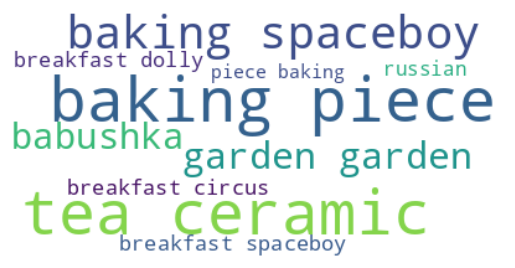

In [ ]:
# POSITIVE TERMS IN NEXT WORDS
aspectSentimentWordcloud(retail_data, classification=1, aspect='set', max_words=10, rule='next')

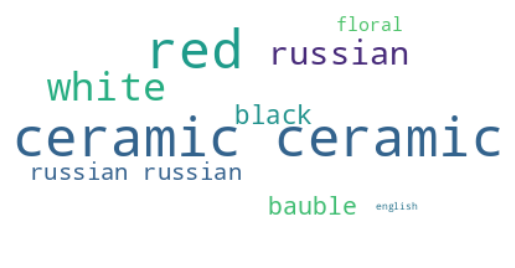

In [ ]:
# POSITIVE SENTIMENTS FOR 'SET' IN NEAR WORDS
aspectSentimentWordcloud(retail_data, classification=1, aspect='set', max_words=15, rule='near')

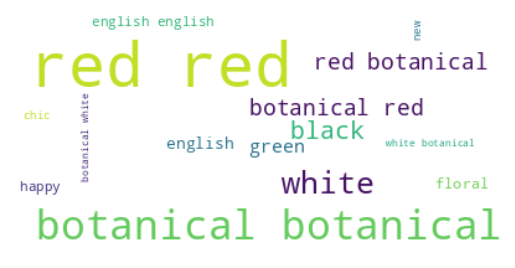

In [ ]:
# NEGATIVE SENTIMENTS FOR 'SET' IN NEAR WORDS
aspectSentimentWordcloud(retail_data, classification=-1, aspect='set', max_words=15, rule='near')

In [ ]:
retail_data

,index,Description,Quantity,Price,Country,Description_token,review_aspects,review_adjectives,review_classification
0,0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,United Kingdom,"[cm, christmas, glass, ball, light]","[light, christmas, glass, ball, cm]",[],1
1,1,PINK CHERRY LIGHTS,12,6.75,United Kingdom,"[pink, cherry, light]","[pink, light, cherry]",[],1
2,2,WHITE CHERRY LIGHTS,12,6.75,United Kingdom,"[white, cherry, light]","[white, light, cherry]",[white],1
3,3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,United Kingdom,"[record, frame, single, size]","[frame, single, size]",[single],-1
4,4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,United Kingdom,"[strawberry, ceramic, trinket, box]","[box, ceramic, strawberry, trinket]",[ceramic],-1
...,...,...,...,...,...,...,...,...,...
417529,525456,FELTCRAFT DOLL ROSIE,2,2.95,United Kingdom,"[feltcraft, doll, rosie]","[feltcraft, doll]",[],-1
417530,525457,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,United Kingdom,"[feltcraft, princess, lola, doll]","[feltcraft, doll, lola]",[],-1
417531,525458,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,United Kingdom,"[feltcraft, princess, olivia, doll]","[feltcraft, doll]",[],-1
417532,525459,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,United Kingdom,"[pink, floral, feltcraft, shoulder, bag]","[bag, pink, feltcraft, floral, shoulder]",[floral],-1


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(retail_data.Description_token,retail_data.review_classification,test_size = 0.2 , random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(retail_data['Description_token'].map(''.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4208,4209,4210,4211,4212,4213,4214,4215,4216,4217
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
